In [8]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns

pd.set_option('display.max_rows', 60)
pd.set_option('display.max_columns', 20)
pd.set_option('display.width', 80)
pd.set_option('display.max_colwidth', 50)

In [9]:
# # Replace the paths with the actual paths to your JSON files
# kiosk_data_json_path = '../../data/raw/metro_bike_kiosks.json'
# trip_data_csv_path = '../../data/raw/Austin_MetroBike_Trips_20231231.csv'
# trip_data_json_path = '../../data/raw/Austin_MetroBike_Trips.json'

# try:
#     # Loading the kiosk data into a DataFrame
#     kiosk_df = pd.read_json(kiosk_data_json_path)

#     dtype_dict = {
#         'Trip ID': 'int64',
#         'Membership or Pass Type': 'str',
#         'Bicycle ID': 'str',
#         'Bike Type': 'str',
#         'Checkout Datetime': 'str',  # or 'datetime64' if you want to parse dates
#         'Checkout Date': 'str',  # or 'datetime64'
#         'Checkout Time': 'str',
#         'Checkout Kiosk ID': 'str',
#         'Checkout Kiosk': 'str',
#         'Return Kiosk ID': 'str',
#         'Return Kiosk': 'str',
#         'Trip Duration Minutes': 'int64',
#         'Month': 'str',
#         'Year': 'int64'
#     }

#     trip_df = pd.read_json(trip_data_json_path, lines=True)

#     # Normalizing the 'location' column and splitting it into 'latitude' and 'longitude'
#     location_df = pd.json_normalize(kiosk_df['location'])
#     kiosk_df = pd.concat([kiosk_df.drop(columns=['location']), location_df], axis=1)

#     dtype_dict = {
#         'Trip ID': 'int64',
#         'Membership or Pass Type': 'str',
#         'Bicycle ID': 'str',
#         'Bike Type': 'str',
#         'Checkout Datetime': 'str',  # or 'datetime64' if you want to parse dates
#         'Checkout Date': 'str',  # or 'datetime64'
#         'Checkout Time': 'str',
#         'Checkout Kiosk ID': 'str',
#         'Checkout Kiosk': 'str',
#         'Return Kiosk ID': 'str',
#         'Return Kiosk': 'str',
#         'Trip Duration Minutes': 'int64',
#         'Month': 'str',
#         'Year': 'int64'
#     }

#     # # Load the CSV file into a DataFrame
#     # trip_df = pd.read_csv(trip_data_csv_path, dtype=dtype_dict)

#     # # Save the DataFrame as a JSON file
#     # trip_df.to_json(trip_data_json_path, orient='records')

#     # Displaying the dataframes
#     display(trip_df)
#     display(kiosk_df)

#     # Displaying the total number of rows in each DataFrame
#     print("Total rows in kiosk_df:", len(kiosk_df))
#     print("Total rows in trip_df:", len(trip_df))

# except Exception as e:
#     print("An error occurred:", e)

In [10]:
# Load the JSON file into a DataFrame
json_file_path = '../../data/raw/Austin_MetroBike_Trips.json'
kiosk_data_json_path = '../../data/raw/metro_bike_kiosks.json'

# Loading the kiosk data into a DataFrame
kiosk_df = pd.read_json(kiosk_data_json_path)

# Normalizing the 'location' column and splitting it into 'latitude' and 'longitude'
location_df = pd.json_normalize(kiosk_df['location'])
kiosk_df = pd.concat([kiosk_df.drop(columns=['location']), location_df], axis=1)

data_df = pd.read_json(json_file_path)

display(data_df)

unique_combos_df = data_df[['Membership or Pass Type', 'Bike Type']].drop_duplicates()

# Display the DataFrame with unique combinations
display(unique_combos_df.head(50))

,Trip ID,Membership or Pass Type,Bicycle ID,Bike Type,Checkout Datetime,Checkout Date,Checkout Time,Checkout Kiosk ID,Checkout Kiosk,Return Kiosk ID,Return Kiosk,Trip Duration Minutes,Month,Year
0,29710677,Local365,19847,electric,05/24/2023 06:32:11 PM,05/24/2023,18:32:11,2552.0,3rd/West,2552,4th/Guadalupe @ Republic Square,3,5,2023
1,29745510,Local365,21491,electric,05/28/2023 02:12:12 PM,05/28/2023,14:12:12,3685.0,9th/Henderson,3685,2nd/Congress,6,5,2023
2,29550686,Local365,157G,classic,05/06/2023 08:26:05 PM,05/06/2023,20:26:05,2497.0,11th/Congress @ The Texas Capitol,2497,21st/Guadalupe,10,5,2023
3,29667683,Local365,17751,electric,05/20/2023 07:18:09 AM,05/20/2023,7:18:09,2504.0,South Congress/Elizabeth,2504,South Congress/Elizabeth,7,5,2023
4,29632824,Local365,21455,electric,05/15/2023 05:12:36 PM,05/15/2023,17:12:36,2499.0,2nd/Lavaca @ City Hall,2499,South Congress/Elizabeth,8,5,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2112258,13291677,Walk Up,411,classic,12/28/2016 08:58:25 PM,12/28/2016,20:58:25,2494.0,2nd & Congress,2494,2nd & Congress,53,12,2016
2112259,13291683,Walk Up,206,classic,12/28/2016 08:59:18 PM,12/28/2016,20:59:18,2494.0,2nd & Congress,2494,2nd & Congress,52,12,2016
2112260,13295175,Walk Up,398,classic,12/29/2016 09:37:35 AM,12/29/2016,9:37:35,2494.0,2nd & Congress,2494,2nd & Congress,33,12,2016
2112261,13295885,Walk Up,306,classic,12/29/2016 10:48:41 AM,12/29/2016,10:48:41,2494.0,2nd & Congress,2494,2nd & Congress,118,12,2016


,Membership or Pass Type,Bike Type
0,Local365,electric
2,Local365,classic
16,Local31,electric
18,Local31,classic
38,None,electric
59,Explorer,electric
79,Student Membership,electric
86,Explorer,classic
87,3-Day Weekender,electric
112,Annual,classic


In [11]:
# Display the DataFrame with unique combinations
display(unique_combos_df.head(50))

,Membership or Pass Type,Bike Type
0,Local365,electric
2,Local365,classic
16,Local31,electric
18,Local31,classic
38,None,electric
59,Explorer,electric
79,Student Membership,electric
86,Explorer,classic
87,3-Day Weekender,electric
112,Annual,classic


In [12]:
# Assuming 'Kiosk ID' is the common column in kiosk_df
# Rename columns in kiosk_df for merging
kiosk_df_checkout = kiosk_df.rename(columns={'kiosk_id': 'Checkout Kiosk ID', 'latitude': 'Checkout_Kiosk_Lat', 'longitude': 'Checkout_Kiosk_Long'})
kiosk_df_return = kiosk_df.rename(columns={'kiosk_id': 'Return Kiosk ID', 'latitude': 'Return_Kiosk_Lat', 'longitude': 'Return_Kiosk_Long'})

# Convert 'Checkout Kiosk ID' in data_df to integer, handling non-numeric values and NaNs
data_df['Checkout Kiosk ID'] = pd.to_numeric(data_df['Checkout Kiosk ID'], errors='coerce').fillna(0).astype(int)

# Convert 'Return Kiosk ID' in data_df to integer, handling non-numeric values and NaNs
data_df['Return Kiosk ID'] = pd.to_numeric(data_df['Return Kiosk ID'], errors='coerce').fillna(0).astype(int)

# Convert 'Return Kiosk ID' in kiosk_df_return to integer
kiosk_df_return['Return Kiosk ID'] = pd.to_numeric(kiosk_df_return['Return Kiosk ID'], errors='coerce').fillna(0).astype(int)

# Convert 'Checkout Kiosk ID' in kiosk_df_checkout to integer
kiosk_df_checkout['Checkout Kiosk ID'] = pd.to_numeric(kiosk_df_checkout['Checkout Kiosk ID'], errors='coerce').fillna(0).astype(int)

# Merge data_df with kiosk_df on 'Checkout Kiosk'
data_df = pd.merge(data_df, kiosk_df_checkout[['Checkout Kiosk ID', 'Checkout_Kiosk_Lat', 'Checkout_Kiosk_Long']], on='Checkout Kiosk ID', how='left')

# Merge data_df with kiosk_df on 'Return Kiosk'
data_df = pd.merge(data_df, kiosk_df_return[['Return Kiosk ID', 'Return_Kiosk_Lat', 'Return_Kiosk_Long']], on='Return Kiosk ID', how='left')

# Creating a debug DataFrame for NaN values
kiosk_missing_data_df = data_df[data_df[['Checkout_Kiosk_Lat', 'Checkout_Kiosk_Long', 'Return_Kiosk_Lat', 'Return_Kiosk_Long']].isna().any(axis=1)]

# Filtering kiosk_missing_data_df for rows where 'Checkout_Kiosk_Lat' and 'Checkout_Kiosk_Long' are NaN
nan_checkout_kiosk_df = kiosk_missing_data_df[kiosk_missing_data_df[['Checkout_Kiosk_Lat', 'Checkout_Kiosk_Long']].isna().any(axis=1)]

# Filtering kiosk_missing_data_df for rows where 'Return_Kiosk_Lat' and 'Return_Kiosk_Long' are NaN
nan_return_kiosk_df = kiosk_missing_data_df[kiosk_missing_data_df[['Return_Kiosk_Lat', 'Return_Kiosk_Long']].isna().any(axis=1)]

# Getting unique Return Kiosk IDs where 'Return_Kiosk_Lat' and 'Return_Kiosk_Long' are NaN
unique_return_ids = nan_return_kiosk_df['Return Kiosk ID'].unique()

# Getting unique Checkout Kiosk IDs where 'Checkout_Kiosk_Lat' and 'Checkout_Kiosk_Long' are NaN
unique_checkout_ids = nan_checkout_kiosk_df['Checkout Kiosk ID'].unique()

# Converting numpy arrays to lists before concatenation
unique_checkout_ids_list = unique_checkout_ids.tolist()
unique_return_ids_list = unique_return_ids.tolist()

# Consolidating and sorting
unique_kiosk_ids = sorted(set(unique_checkout_ids_list + unique_return_ids_list))

# Printing a descriptive message with count
print(f"Total unique kiosk IDs found in both 'Checkout Kiosk ID' and 'Return Kiosk ID' columns: {len(unique_kiosk_ids)}")
print(f"Unique kiosk IDs missing from Kiosk fact table: {unique_kiosk_ids}")

Total unique kiosk IDs found in both 'Checkout Kiosk ID' and 'Return Kiosk ID' columns: 12
Unique kiosk IDs missing from Kiosk fact table: [3456, 4938, 7125, 7131, 7186, 7187, 7188, 7189, 7190, 7253, 7341, 7637]


In [13]:
# Filtering out rows with null values in any of the four specified columns
filtered_df = data_df.dropna(subset=['Checkout_Kiosk_Lat', 'Checkout_Kiosk_Long', 'Return_Kiosk_Lat', 'Return_Kiosk_Long'])

# Filtering filtered_df for rows where 'Checkout Kiosk ID' is equal to 'Return Kiosk ID' 
# to exlcude trips that end where they started
filtered_df2 = filtered_df[~(filtered_df['Checkout Kiosk ID'] == filtered_df['Return Kiosk ID'])]

# Filtering out rows with inactive kiosks
active_kiosks = kiosk_df[kiosk_df['kiosk_status'] == 'active']['kiosk_id']
filtered_df3 = filtered_df2[(filtered_df2['Checkout Kiosk ID'].isin(active_kiosks)) & (filtered_df2['Return Kiosk ID'].isin(active_kiosks))]

# Grouping by Year and Month to count trips (All kiosks)
year_month_trip_df_all = filtered_df2.groupby(['Year', 'Month']).size().reset_index(name='Trip Count')

# Creating a combined year_month column
year_month_trip_df_all['Year_Month'] = pd.to_datetime(year_month_trip_df_all[['Year', 'Month']].assign(DAY=1))
year_month_trip_df_all = year_month_trip_df_all.sort_values('Year_Month')

# Adding rolling averages
year_month_trip_df_all['3 Month MA'] = year_month_trip_df_all['Trip Count'].rolling(window=3).mean()
year_month_trip_df_all['6 Month MA'] = year_month_trip_df_all['Trip Count'].rolling(window=6).mean()
year_month_trip_df_all['12 Month MA'] = year_month_trip_df_all['Trip Count'].rolling(window=12).mean()

# Grouping by Year and Month to count trips (Active Kiosks only)
year_month_trip_df_active_only = filtered_df3.groupby(['Year', 'Month']).size().reset_index(name='Trip Count')

# Creating a combined year_month column
year_month_trip_df_active_only['Year_Month'] = pd.to_datetime(year_month_trip_df_active_only[['Year', 'Month']].assign(DAY=1))
year_month_trip_df_active_only = year_month_trip_df_active_only.sort_values('Year_Month')

# Adding rolling averages
year_month_trip_df_active_only['3 Month MA'] = year_month_trip_df_active_only['Trip Count'].rolling(window=3).mean()
year_month_trip_df_active_only['6 Month MA'] = year_month_trip_df_active_only['Trip Count'].rolling(window=6).mean()
year_month_trip_df_active_only['12 Month MA'] = year_month_trip_df_active_only['Trip Count'].rolling(window=12).mean()


Original DataFrame (data_df) rows: 2112263
Rows after removing rows invalid Kiosk ID's: 1965145
Rows after removing trips with identical checkout/return Kiosks: 1675864


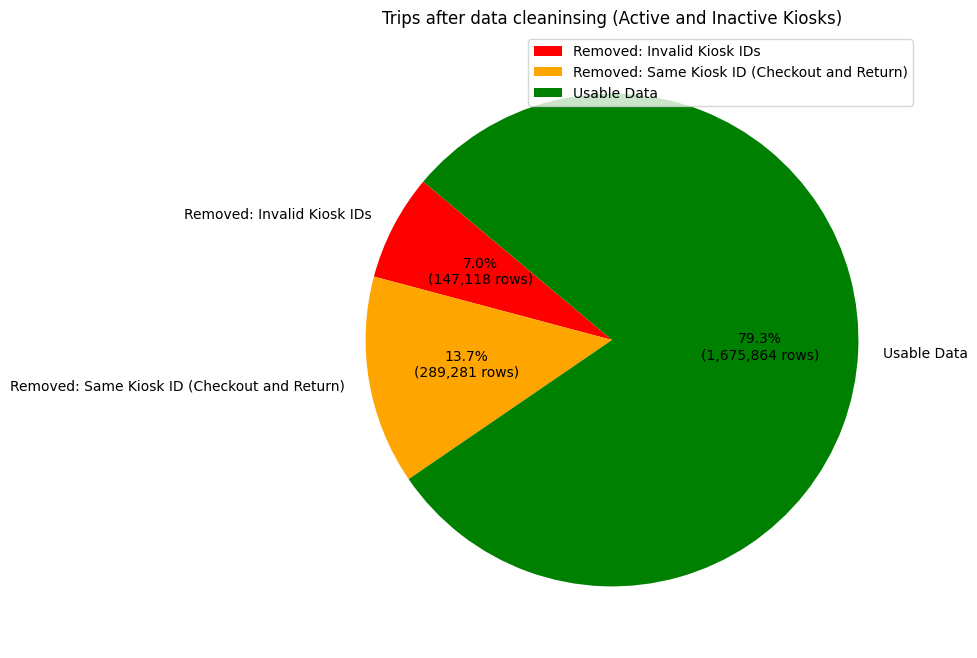

In [14]:
# Printing the number of rows in each DataFrame
print(f"Original DataFrame (data_df) rows: {len(data_df)}")
print(f"Rows after removing rows invalid Kiosk ID's: {len(filtered_df)}")
print(f"Rows after removing trips with identical checkout/return Kiosks: {len(filtered_df2)}")

# Number of rows in each DataFrame
original_rows = len(data_df)
rows_after_invalid_kiosk_ids = len(filtered_df)
rows_after_checkout_return_filter = len(filtered_df2)

# Calculating the number of rows removed in each step
rows_removed_invalid_kiosk_ids = original_rows - rows_after_invalid_kiosk_ids
rows_removed_checkout_return_filter = rows_after_invalid_kiosk_ids - rows_after_checkout_return_filter
usable_rows = rows_after_checkout_return_filter

# Labels for the pie chart
labels = [
    f'Removed: Invalid Kiosk IDs', 
    f'Removed: Same Kiosk ID (Checkout and Return)',
    f'Usable Data'
]

# Values for each slice of the pie chart
values = [
    rows_removed_invalid_kiosk_ids, 
    rows_removed_checkout_return_filter,
    usable_rows
]

# Colors for each slice of the pie chart
colors = ['red', 'orange', 'green']

# Create a pie chart
plt.figure(figsize=(10, 8))
plt.pie(values, labels=labels, colors=colors, autopct=lambda p: '{:.1f}%\n({:,.0f} rows)'.format(p, p * sum(values) / 100), startangle=140)
plt.legend()
plt.title('Trips after data cleaninsing (Active and Inactive Kiosks)')
plt.show()

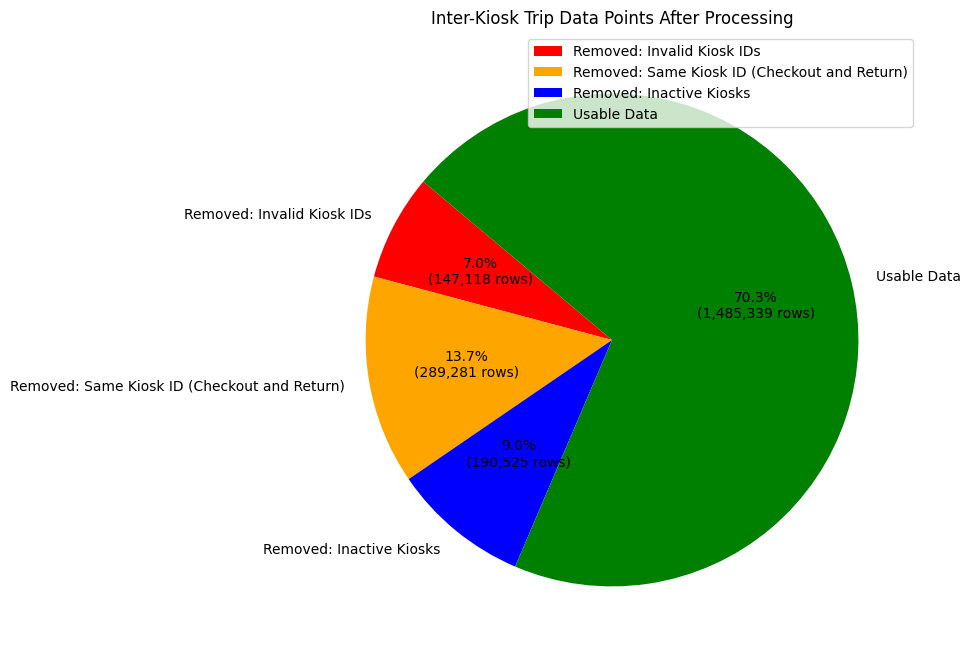

In [15]:
# Replace these counts with the actual lengths of your DataFrames
original_rows = len(data_df)
rows_after_invalid_kiosk_ids = len(filtered_df)
rows_after_checkout_return_filter = len(filtered_df2)
rows_on_active_kiosks = len(filtered_df3)

# Calculating the number of rows removed in each step
rows_removed_invalid_kiosk_ids = original_rows - rows_after_invalid_kiosk_ids
rows_removed_checkout_return_filter = rows_after_invalid_kiosk_ids - rows_after_checkout_return_filter
rows_removed_inactive_kiosks = rows_after_checkout_return_filter - rows_on_active_kiosks
usable_rows = rows_on_active_kiosks

# Labels for the pie chart
labels = [
    'Removed: Invalid Kiosk IDs', 
    'Removed: Same Kiosk ID (Checkout and Return)',
    'Removed: Inactive Kiosks',
    'Usable Data'
]

# Values for each slice of the pie chart
values = [
    rows_removed_invalid_kiosk_ids, 
    rows_removed_checkout_return_filter,
    rows_removed_inactive_kiosks,
    usable_rows
]

# Colors for each slice of the pie chart
colors = ['red', 'orange', 'blue', 'green']

# Create a pie chart
plt.figure(figsize=(10, 8))
plt.pie(values, labels=labels,colors = colors, autopct=lambda p: '{:.1f}%\n({:,.0f} rows)'.format(p, p * sum(values) / 100), startangle=140)
plt.title('Inter-Kiosk Trip Data Points After Processing')
plt.legend()
plt.show()

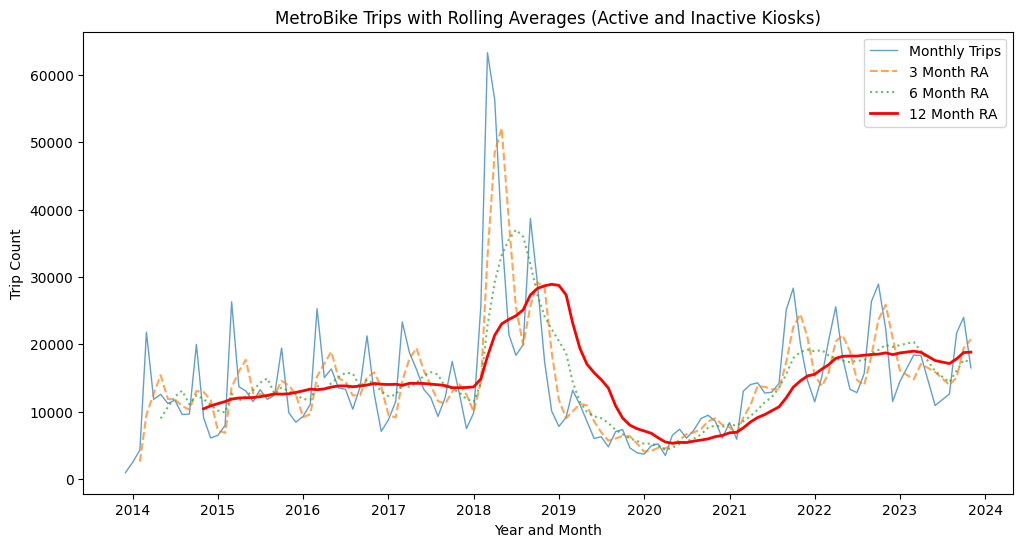

In [16]:
# Plotting the graph
plt.figure(figsize=(12, 6))
plt.plot(year_month_trip_df_all['Year_Month'], year_month_trip_df_all['Trip Count'], label='Monthly Trips', linewidth=1, alpha=0.7)
plt.plot(year_month_trip_df_all['Year_Month'], year_month_trip_df_all['3 Month MA'], label='3 Month RA', linestyle='--', alpha=0.7)
plt.plot(year_month_trip_df_all['Year_Month'], year_month_trip_df_all['6 Month MA'], label='6 Month RA', linestyle=':', alpha=0.7)
plt.plot(year_month_trip_df_all['Year_Month'], year_month_trip_df_all['12 Month MA'], label='12 Month RA', linestyle='-', linewidth=2, color='red')
plt.xlabel('Year and Month')
plt.ylabel('Trip Count')
plt.title('MetroBike Trips with Rolling Averages (Active and Inactive Kiosks)')
plt.legend()
plt.show()

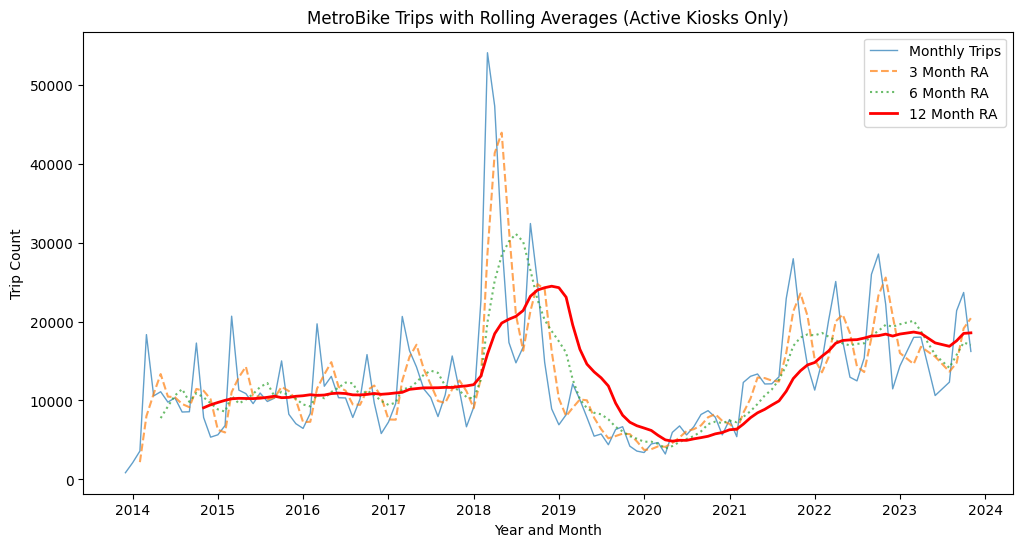

In [17]:
# Plotting the graph
plt.figure(figsize=(12, 6))
plt.plot(year_month_trip_df_active_only['Year_Month'], year_month_trip_df_active_only['Trip Count'], label='Monthly Trips', linewidth=1, alpha=0.7)
plt.plot(year_month_trip_df_active_only['Year_Month'], year_month_trip_df_active_only['3 Month MA'], label='3 Month RA', linestyle='--', alpha=0.7)
plt.plot(year_month_trip_df_active_only['Year_Month'], year_month_trip_df_active_only['6 Month MA'], label='6 Month RA', linestyle=':', alpha=0.7)
plt.plot(year_month_trip_df_active_only['Year_Month'], year_month_trip_df_active_only['12 Month MA'], label='12 Month RA', linestyle='-', linewidth=2, color='red')
plt.xlabel('Year and Month')
plt.ylabel('Trip Count')
plt.title('MetroBike Trips with Rolling Averages (Active Kiosks Only)')
plt.legend()
plt.show()

In [18]:
display(year_month_trip_df_all.head(50))

,Year,Month,Trip Count,Year_Month,3 Month MA,6 Month MA,12 Month MA
0,2013,12,963,2013-12-01,NaN,NaN,NaN
1,2014,1,2504,2014-01-01,NaN,NaN,NaN
2,2014,2,4337,2014-02-01,2601.333333,NaN,NaN
3,2014,3,21807,2014-03-01,9549.333333,NaN,NaN
4,2014,4,11850,2014-04-01,12664.666667,NaN,NaN
5,2014,5,12588,2014-05-01,15415.000000,9008.166667,NaN
6,2014,6,11224,2014-06-01,11887.333333,10718.333333,NaN
7,2014,7,11717,2014-07-01,11843.000000,12253.833333,NaN
8,2014,8,9596,2014-08-01,10845.666667,13130.333333,NaN
9,2014,9,9663,2014-09-01,10325.333333,11106.333333,NaN


In [19]:
filtered_df3.to_json('../../data/processed/cleaned_metrobike_trips.json', orient='records')

In [20]:
kiosk_df = kiosk_df[kiosk_df['kiosk_status'] != 'closed']

# Reset the index of the DataFrame
kiosk_df = kiosk_df.reset_index(drop=True)

display(kiosk_df)

,kiosk_id,kiosk_name,kiosk_status,address,council_district,modified_date,:@computed_region_a3it_2a2z,:@computed_region_8spj_utxs,city_asset_num,property_type,number_of_docks,power_type,footprint_length_feet,footprint_width_feet,notes,alt_name,latitude,longitude
0,2707,Rainey St @ Cummings,active,1 Rainey St,9,2022-03-04T10:38:00.000,2856,9,16597.0,parkland,17.0,solar,50.0,5.0,parkland at ROW/easement,NaN,30.255906,-97.739949
1,3838,Nueces & 26th,active,600 W. 26th St.,9,2021-01-04T00:00:00.000,2860,9,16744.0,undetermined_parking,13.0,solar,40.0,5.0,NaN,NaN,30.29068,-97.74292
2,4051,10th & Red River,active,699 East 10th Street,1,2021-01-04T00:00:00.000,2856,1,32686.0,paid_parking,13.0,solar,40.0,5.0,NaN,NaN,30.27024,-97.73578
3,4061,Lakeshore @ Austin Hostel,active,2200 S Lakeshore Blvd,3,2021-01-04T00:00:00.000,3256,3,32692.0,nonmetered_parking,15.0,solar,45.0,5.0,NaN,NaN,30.24472,-97.72336
4,11,22nd 1/2 & Rio Grande,active,710 W. 22 1/2 St,9,2021-11-04T14:24:00.000,2860,9,NaN,sidewalk,4.0,solar,NaN,NaN,Kiosk ID & footprint length and width to be re...,NaN,30.2862,-97.74516
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,4060,Red River/Cesar Chavez @ The Fairmont,active,101 Red River St.,9,2021-01-04T00:00:00.000,2856,9,32691.0,sidewalk,13.0,solar,40.0,5.0,NaN,NaN,30.26214,-97.7387
74,4062,Lakeshore & Pleasant Valley,active,2525 South Lakeshore Boulevard,3,2021-01-04T00:00:00.000,3256,3,32711.0,nonmetered_parking,18.0,solar,55.0,5.0,NaN,NaN,30.24258,-97.71726
75,4699,East 5th/Shady @ Eastside Bus Plaza,active,5104 East 5th. Street,3,2021-07-27T08:25:00.000,2857,3,32522.0,sidewalk,10.0,solar,15.0,10.0,NaN,NaN,30.25212,-97.69807
76,4879,16th/San Antonio,active,1601 San Antonio Street,9,2021-03-12T13:15:00.000,2856,9,16739.0,paid_parking,12.0,solar,40.0,5.0,NaN,NaN,30.27924,-97.74371


In [21]:
# Assuming filtered_df3 is your DataFrame with 'Checkout Kiosk ID' and 'Return Kiosk ID' columns
# Extract unique Kiosk IDs from both Checkout and Return columns
unique_checkout_kiosk_id_df = filtered_df3['Checkout Kiosk ID'].unique()
unique_return_kiosk_id_df = filtered_df3['Return Kiosk ID'].unique()

# Combine the unique values from both columns and remove duplicates
combined_unique_ids = pd.unique(np.concatenate((unique_checkout_kiosk_id_df, unique_return_kiosk_id_df)))

# Create a new DataFrame from the combined unique IDs
unique_kiosk_id_with_trips_df = pd.DataFrame(combined_unique_ids, columns=['Kiosk ID'])

# Display the DataFrame with unique Kiosk IDs
print("Unique Kiosk IDs from both Checkout and Return columns:")
display(unique_kiosk_id_with_trips_df)

# Identify kiosk_ids from kiosk_df that are not present in unique_kiosk_id_with_trips_df
kiosks_with_no_trips = kiosk_df[~kiosk_df['kiosk_id'].isin(unique_kiosk_id_with_trips_df['Kiosk ID'])]

# Display the DataFrame with kiosks that have no trips
print("Kiosks from kiosk_df that are not present in unique_kiosk_id_with_trips_df")
print("A.K.A Kiosks with no trips")
display(kiosks_with_no_trips)

Unique Kiosk IDs from both Checkout and Return columns:


,Kiosk ID
0,3793
1,2494
2,2501
3,2503
4,2495
...,...
70,4054
71,4055
72,0
73,2550


Kiosks from kiosk_df that are not present in unique_kiosk_id_with_trips_df
A.K.A Kiosks with no trips


,kiosk_id,kiosk_name,kiosk_status,address,council_district,modified_date,:@computed_region_a3it_2a2z,:@computed_region_8spj_utxs,city_asset_num,property_type,number_of_docks,power_type,footprint_length_feet,footprint_width_feet,notes,alt_name,latitude,longitude
4,11,22nd 1/2 & Rio Grande,active,710 W. 22 1/2 St,9,2021-11-04T14:24:00.000,2860,9,NaN,sidewalk,4.0,solar,NaN,NaN,Kiosk ID & footprint length and width to be re...,NaN,30.2862,-97.74516
5,111,23rd & San Gabriel,active,915 W 23rd St,9,2021-11-04T14:15:00.000,2860,9,NaN,paid_parking,13.0,solar,NaN,NaN,Kiosk ID and Footprint length & width to be re...,NaN,30.2874,-97.7478
6,1111,13th & Trinity,active,910 Trinity Street,1,2021-11-04T14:12:00.000,2856,1,NaN,sidewalk,13.0,solar,NaN,NaN,The Kiosk ID and footprint length & width stil...,NaN,30.2741,-97.73666


In [22]:
# Extract kiosk_id values from kiosks_with_no_trips
ids_to_remove = kiosks_with_no_trips['kiosk_id'].unique()

# Filter out rows where kiosk_id is in ids_to_remove from kiosk_df
kiosk_df = kiosk_df[~kiosk_df['kiosk_id'].isin(ids_to_remove)]

# Filter out rows where kiosk_id is 0
kiosk_df = kiosk_df[kiosk_df['kiosk_id'] != 0]

# Reset the index of the DataFrame
kiosk_df = kiosk_df.reset_index(drop=True)

display(kiosk_df)

kiosk_df.to_json('../../dist/data/processed/kiosk_coords.json', orient='records')
kiosk_df.to_csv('../../data/processed/Kiosk_with_LatLong.csv', index=False)

,kiosk_id,kiosk_name,kiosk_status,address,council_district,modified_date,:@computed_region_a3it_2a2z,:@computed_region_8spj_utxs,city_asset_num,property_type,number_of_docks,power_type,footprint_length_feet,footprint_width_feet,notes,alt_name,latitude,longitude
0,2707,Rainey St @ Cummings,active,1 Rainey St,9,2022-03-04T10:38:00.000,2856,9,16597.0,parkland,17.0,solar,50.0,5.0,parkland at ROW/easement,NaN,30.255906,-97.739949
1,3838,Nueces & 26th,active,600 W. 26th St.,9,2021-01-04T00:00:00.000,2860,9,16744.0,undetermined_parking,13.0,solar,40.0,5.0,NaN,NaN,30.29068,-97.74292
2,4051,10th & Red River,active,699 East 10th Street,1,2021-01-04T00:00:00.000,2856,1,32686.0,paid_parking,13.0,solar,40.0,5.0,NaN,NaN,30.27024,-97.73578
3,4061,Lakeshore @ Austin Hostel,active,2200 S Lakeshore Blvd,3,2021-01-04T00:00:00.000,3256,3,32692.0,nonmetered_parking,15.0,solar,45.0,5.0,NaN,NaN,30.24472,-97.72336
4,2494,2nd & Congress,active,151 E. 2nd St,9,2021-01-04T00:00:00.000,2856,9,16733.0,paid_parking,15.0,solar,45.0,5.0,NaN,NaN,30.26408,-97.74355
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,4059,Nash Hernandez @ RBJ South,active,1316 Festival Beach Rd,3,2021-01-04T00:00:00.000,2857,3,32693.0,nonmetered_parking,13.0,solar,40.0,5.0,NaN,NaN,30.252,-97.7346
70,4060,Red River/Cesar Chavez @ The Fairmont,active,101 Red River St.,9,2021-01-04T00:00:00.000,2856,9,32691.0,sidewalk,13.0,solar,40.0,5.0,NaN,NaN,30.26214,-97.7387
71,4062,Lakeshore & Pleasant Valley,active,2525 South Lakeshore Boulevard,3,2021-01-04T00:00:00.000,3256,3,32711.0,nonmetered_parking,18.0,solar,55.0,5.0,NaN,NaN,30.24258,-97.71726
72,4699,East 5th/Shady @ Eastside Bus Plaza,active,5104 East 5th. Street,3,2021-07-27T08:25:00.000,2857,3,32522.0,sidewalk,10.0,solar,15.0,10.0,NaN,NaN,30.25212,-97.69807


44
166


<Figure size 1200x600 with 0 Axes>

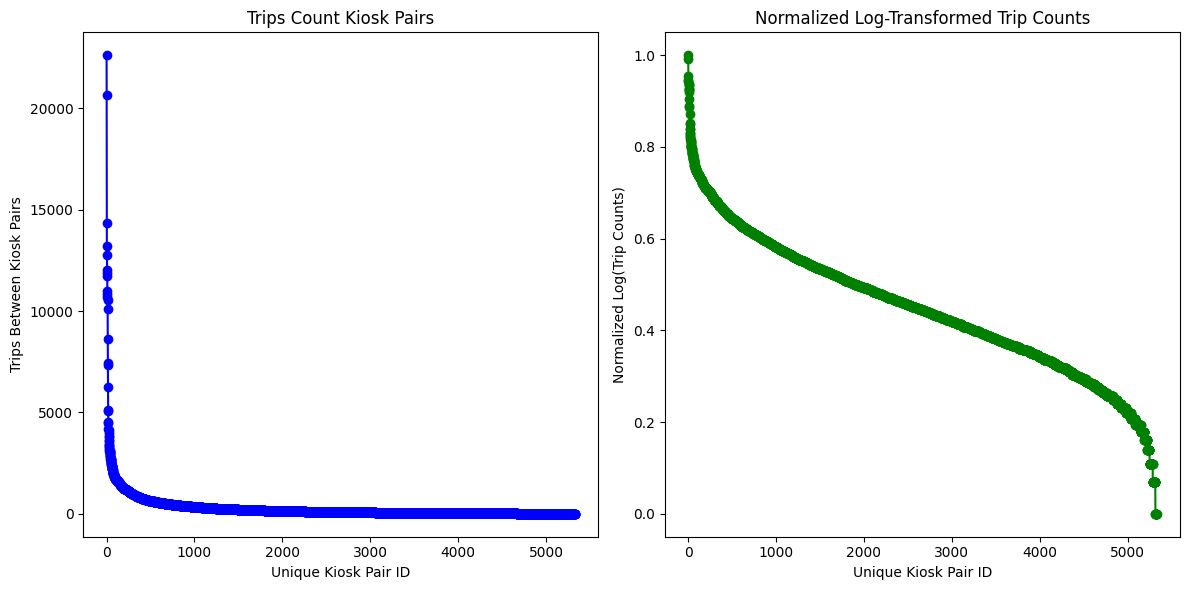

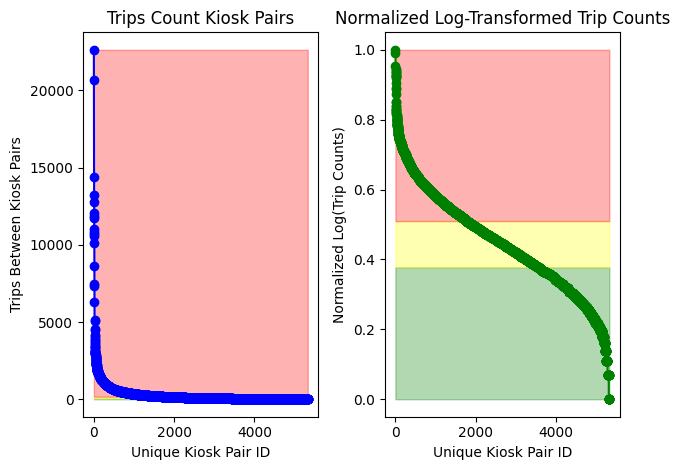

Total number of points: 5329
One third value (original counts): 44
Two third value (original counts): 166
One third value (normalized log trip counts): 0.37741376118964753
Two third value (normalized log trip counts): 0.5098408708343459


In [43]:
# List of valid kiosk IDs
valid_kiosk_ids = kiosk_df['kiosk_id'].unique()

# display(valid_kiosk_ids)
# print(len(valid_kiosk_ids))

# Filter rows where both 'Checkout Kiosk ID' and 'Return Kiosk ID' are in valid_kiosk_ids
filtered_df4 = filtered_df3[filtered_df3['Checkout Kiosk ID'].isin(valid_kiosk_ids) & 
                            filtered_df3['Return Kiosk ID'].isin(valid_kiosk_ids)]

# print(filtered_df4['Checkout Kiosk ID'].unique())
# print(len(filtered_df4['Checkout Kiosk ID'].unique()))
# print(filtered_df4['Return Kiosk ID'].unique())
# print(len(filtered_df4['Return Kiosk ID'].unique()))

# Group by 'Checkout Kiosk ID' and 'Return Kiosk ID' and count occurrences
combinations_count_df = filtered_df4.groupby(['Checkout Kiosk ID', 'Return Kiosk ID']).size().reset_index(name='Count')

# Sorting the DataFrame by 'Count' in descending order
combinations_count_df = combinations_count_df.sort_values(by='Count', ascending=False)

# Assuming combinations_count_df['Count'] contains the trip counts
trip_counts = combinations_count_df['Count'].values

# Log-transforming the counts
log_trip_counts = np.log(trip_counts)  # Adding 1 to avoid log(0)

# Normalizing the log-transformed counts to a range of 0 to 1
min_log_count = np.min(log_trip_counts)
max_log_count = np.max(log_trip_counts)
normalized_log_trip_counts = (log_trip_counts - min_log_count) / (max_log_count - min_log_count)

# Plotting
plt.figure(figsize=(12, 6))

# List of valid kiosk IDs
valid_kiosk_ids = kiosk_df['kiosk_id'].unique()

# display(valid_kiosk_ids)
# print(len(valid_kiosk_ids))

# Filter rows where both 'Checkout Kiosk ID' and 'Return Kiosk ID' are in valid_kiosk_ids
filtered_df4 = filtered_df3[filtered_df3['Checkout Kiosk ID'].isin(valid_kiosk_ids) & 
                            filtered_df3['Return Kiosk ID'].isin(valid_kiosk_ids)]

# print(filtered_df4['Checkout Kiosk ID'].unique())
# print(len(filtered_df4['Checkout Kiosk ID'].unique()))
# print(filtered_df4['Return Kiosk ID'].unique())
# print(len(filtered_df4['Return Kiosk ID'].unique()))

# Group by 'Checkout Kiosk ID' and 'Return Kiosk ID' and count occurrences
combinations_count_df = filtered_df4.groupby(['Checkout Kiosk ID', 'Return Kiosk ID']).size().reset_index(name='Count')

# Sorting the DataFrame by 'Count' in descending order
combinations_count_df = combinations_count_df.sort_values(by='Count', ascending=False)

# Assuming combinations_count_df['Count'] contains the trip counts
trip_counts = combinations_count_df['Count'].values

# Log-transforming the counts
log_trip_counts = np.log(trip_counts)  # Adding 1 to avoid log(0)

# Normalizing the log-transformed counts to a range of 0 to 1
min_log_count = np.min(log_trip_counts)
max_log_count = np.max(log_trip_counts)
normalized_log_trip_counts = (log_trip_counts - min_log_count) / (max_log_count - min_log_count)

# Calculate the 1/3 points for the original counts
one_third_index = len(trip_counts) // 3
two_third_index = 2 * one_third_index

one_third_value = sorted(trip_counts)[one_third_index]
two_third_value = sorted(trip_counts)[two_third_index]

print(one_third_value)
print(two_third_value)

# Calculate the 1/3 points for the normalized log trip counts
one_third_index_log = len(normalized_log_trip_counts) // 3
two_third_index_log = 2 * one_third_index_log

one_third_value_log = sorted(normalized_log_trip_counts)[one_third_index_log]
two_third_value_log = sorted(normalized_log_trip_counts)[two_third_index_log]

one_third_value_log, two_third_value_log

# Plotting
plt.figure(figsize=(12, 6))

# Original trip counts plot
plt.subplot(1, 2, 1)
plt.plot(range(len(trip_counts)), trip_counts, marker='o', color='blue')
plt.title('Trips Count Kiosk Pairs')
plt.xlabel('Unique Kiosk Pair ID')
plt.ylabel('Trips Between Kiosk Pairs')

# Normalized log-transformed trip counts plot
plt.subplot(1, 2, 2)
plt.plot(range(len(normalized_log_trip_counts)), normalized_log_trip_counts, marker='o', color='green')
plt.title('Normalized Log-Transformed Trip Counts')
plt.xlabel('Unique Kiosk Pair ID')
plt.ylabel('Normalized Log(Trip Counts)')

plt.tight_layout()
plt.show()

# Original trip counts plot
ax1 = plt.subplot(1, 2, 1)
plt.plot(range(len(trip_counts)), trip_counts, marker='o', color='blue')
plt.title('Trips Count Kiosk Pairs')
plt.xlabel('Unique Kiosk Pair ID')
plt.ylabel('Trips Between Kiosk Pairs')
# Shading for the original plot
ax1.fill_between(range(len(trip_counts)), 0, one_third_value, color='green', alpha=0.3)  # Green zone
ax1.fill_between(range(len(trip_counts)), one_third_value, two_third_value, color='yellow', alpha=0.3)  # Yellow zone
ax1.fill_between(range(len(trip_counts)), two_third_value, max(trip_counts), color='red', alpha=0.3)  # Red zone

# Normalized log-transformed trip counts plot
ax2 = plt.subplot(1, 2, 2)
plt.plot(range(len(normalized_log_trip_counts)), normalized_log_trip_counts, marker='o', color='green')
plt.title('Normalized Log-Transformed Trip Counts')
plt.xlabel('Unique Kiosk Pair ID')
plt.ylabel('Normalized Log(Trip Counts)')
# Shading for the normalized log plot
ax2.fill_between(range(len(normalized_log_trip_counts)), 0, one_third_value_log, color='green', alpha=0.3)  # Green zone
ax2.fill_between(range(len(normalized_log_trip_counts)), one_third_value_log, two_third_value_log, color='yellow', alpha=0.3)  # Yellow zone
ax2.fill_between(range(len(normalized_log_trip_counts)), two_third_value_log, 1, color='red', alpha=0.3)  # Red zone

plt.tight_layout()
plt.show()

total_points = len(combinations_count_df)
print("Total number of points:", total_points)

print("One third value (original counts):", one_third_value)
print("Two third value (original counts):", two_third_value)

print("One third value (normalized log trip counts):", one_third_value_log)
print("Two third value (normalized log trip counts):", two_third_value_log)

In [24]:
#Testing distributions

data = combinations_count_df['Count']

# List of distributions to test
distributions = [
    stats.norm,         # Normal Distribution
    stats.expon,        # Exponential Distribution
    stats.lognorm,      # Log-Normal Distribution
    stats.weibull_min,  # Weibull Minimum (or Weibull) Distribution
    stats.weibull_max  # Weibull Maximum Distribution
]

# Store the results
results = []

# Poisson distribution
lambda_poisson = np.mean(data)
log_likelihood_poisson = np.sum(stats.poisson.logpmf(data, lambda_poisson))
aic_poisson = -2*log_likelihood_poisson + 2
bic_poisson = -2*log_likelihood_poisson + np.log(len(data))
results.append(('poisson', aic_poisson, bic_poisson))

# Fit the data to each distribution and calculate AIC and BIC
for distribution in distributions:
    # Fit distribution to data
    params = distribution.fit(data)

    # Separate parts of parameters
    arg = params[:-2]
    loc = params[-2]
    scale = params[-1]

    # Calculate the log likelihood
    log_likelihood = np.sum(distribution.logpdf(data, *arg, loc=loc, scale=scale))

    # Calculate AIC and BIC
    aic = -2*log_likelihood + 2*len(params)
    bic = -2*log_likelihood + len(params)*np.log(len(data))

    # Append results
    results.append((distribution.name, aic, bic))

# Convert results to DataFrame
results_df = pd.DataFrame(results, columns=['Distribution', 'AIC', 'BIC'])

# Print AIC and BIC values for all distribution fits
print("\nAIC and BIC values for all tested distributions:")
print(results_df)

# Fit the log-normal distribution to the data
params = stats.lognorm.fit(data)

# Separate parts of parameters
arg = params[:-2]
loc = params[-2]
scale = params[-1]

# Calculate KS statistic and p-value
ks_statistic, ks_p_value = stats.kstest(data, 'lognorm', args=(arg, loc, scale))

ks_statistic, ks_p_value

# combinations_count_df.to_json('../../dist/data/processed/trips_between_kiosks.json', orient='records')
# combinations_count_df.to_json('../../data/processed/trips_between_kiosks.json', orient='records')


AIC and BIC values for all tested distributions:
  Distribution           AIC           BIC
0      poisson  3.423708e+06  3.423715e+06
1         norm  8.660026e+04  8.661342e+04
2        expon  7.040683e+04  7.041999e+04
3      lognorm  6.706612e+04  6.708586e+04
4  weibull_min  6.743657e+04  6.745632e+04
5  weibull_max  1.481767e+05  1.481965e+05


(0.011081495954421858, 0.5259984653288268)

Return Kiosk ID,2494,2495,2496,2497,2498,2499,2501,2503,2504,2537,...,4054,4055,4057,4058,4059,4060,4061,4062,4699,4879
Checkout Kiosk ID,,,,,,,,,,,,,,,,,,,,,
2494,0.000000,0.019453,0.016878,0.036851,0.035262,0.032714,0.037865,0.051975,0.034605,0.016138,...,0.000466,0.000356,0.002548,0.001343,0.002849,0.004165,0.006137,0.002822,0.000301,0.002192
2495,0.019692,0.000000,0.022618,0.032390,0.024578,0.024812,0.090207,0.034263,0.024344,0.022910,...,0.000761,0.000497,0.004828,0.002224,0.003043,0.003921,0.002692,0.002984,0.000614,0.001873
2496,0.036763,0.053200,0.000000,0.049310,0.063829,0.076375,0.046132,0.022025,0.018080,0.026846,...,0.000657,0.001041,0.002192,0.001425,0.004602,0.003178,0.002137,0.001315,0.000384,0.004767
2497,0.056869,0.057477,0.034150,0.000000,0.027363,0.047474,0.022683,0.036293,0.019004,0.020612,...,0.000321,0.001143,0.002072,0.000786,0.002608,0.005644,0.003929,0.001572,0.000357,0.005501
2498,0.021921,0.015070,0.018612,0.012282,0.000000,0.040012,0.023773,0.013307,0.008596,0.013721,...,0.000521,0.000234,0.000683,0.000557,0.000432,0.000719,0.000575,0.000953,0.000252,0.002949
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4060,0.027851,0.024204,0.010776,0.019728,0.007792,0.026028,0.022049,0.017407,0.016910,0.008786,...,0.004808,0.003979,0.013926,0.006797,0.011107,0.000000,0.020391,0.024867,0.003979,0.006466
4061,0.018323,0.008096,0.002983,0.007755,0.001449,0.018408,0.010312,0.007926,0.010482,0.003835,...,0.001364,0.000426,0.007755,0.006903,0.038009,0.007500,0.000000,0.107465,0.007585,0.001023
4062,0.011325,0.011081,0.002070,0.007306,0.003531,0.013517,0.009255,0.005602,0.006819,0.007185,...,0.002801,0.001583,0.011934,0.010351,0.027277,0.016196,0.185217,0.000000,0.006941,0.001705


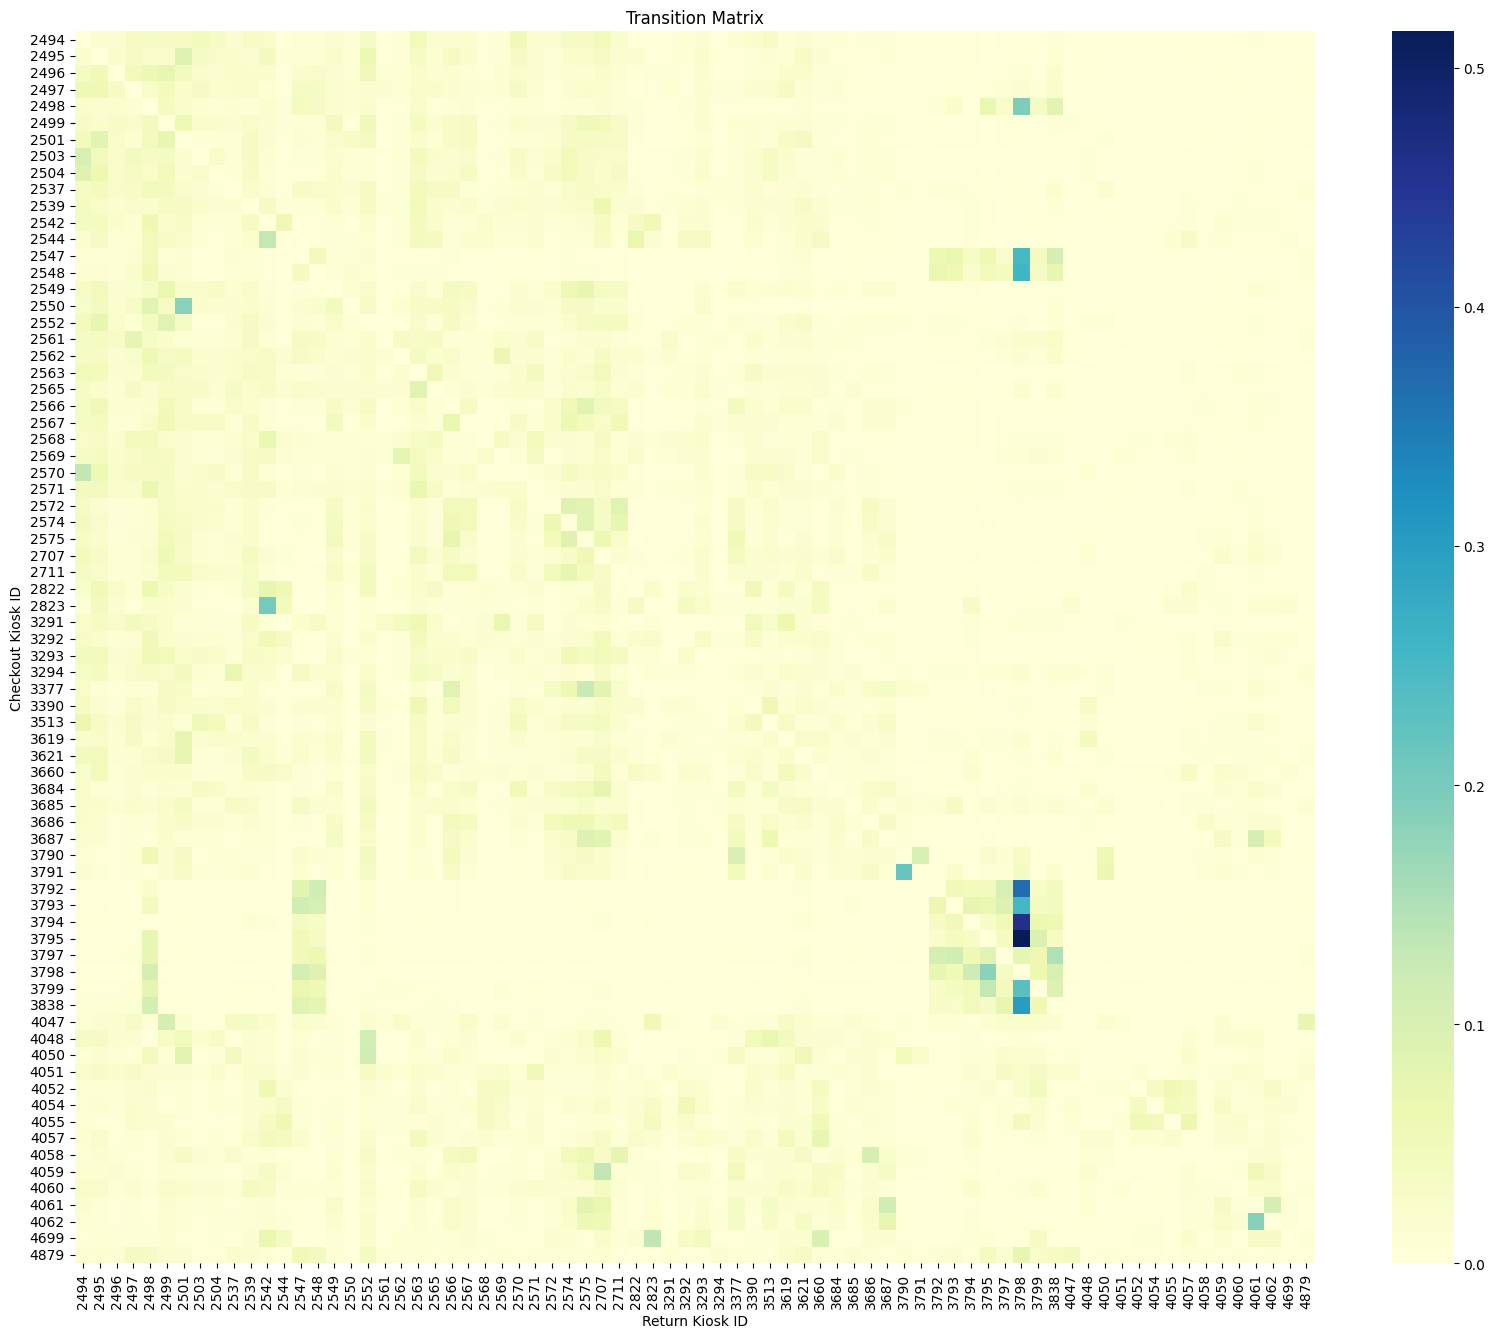

array([0.02805629, 0.02619058, 0.01273519, 0.01663174, 0.03967114,
       0.0299611 , 0.02568812, 0.01440616, 0.01228319, 0.01238955,
       0.01924419, 0.01535064, 0.00620152, 0.02843956, 0.02478496,
       0.01762082, 0.00648024, 0.02383731, 0.00393928, 0.00654733,
       0.02387484, 0.01185103, 0.02192146, 0.01678149, 0.00373478,
       0.00670363, 0.01517466, 0.00976385, 0.0128246 , 0.02432443,
       0.02792564, 0.02820686, 0.01762296, 0.0063428 , 0.00409112,
       0.00329765, 0.00625825, 0.01088703, 0.00353055, 0.01309971,
       0.01179117, 0.01251695, 0.01292738, 0.01447639, 0.00866241,
       0.00782835, 0.00509162, 0.00972806, 0.00940611, 0.00382279,
       0.00201913, 0.0166186 , 0.01682359, 0.01900506, 0.02788656,
       0.01563753, 0.07272348, 0.01815954, 0.02780001, 0.00204591,
       0.00440725, 0.00323397, 0.00119314, 0.00108448, 0.00092053,
       0.00110635, 0.0039191 , 0.0029969 , 0.00494861, 0.00402776,
       0.00831815, 0.00565058, 0.00118262, 0.00336366])

In [25]:
# Create a pivot table
transition_matrix = pd.pivot_table(combinations_count_df, values='Count', 
                                   index='Checkout Kiosk ID', 
                                   columns='Return Kiosk ID', 
                                   fill_value=0)

# Normalize the matrix
transition_matrix = transition_matrix.div(transition_matrix.sum(axis=1), axis=0)

display(transition_matrix)

plt.figure(figsize=(20, 16))
sns.heatmap(transition_matrix, cmap="YlGnBu")
plt.title("Transition Matrix")
plt.show()

#Need ti fix this logic

# Find the steady-state distribution
# This is a solution to the matrix equation πP = π where π is the steady-state vector
eigenvalues, eigenvectors = np.linalg.eig(transition_matrix.T)
stationary = eigenvectors[:, np.isclose(eigenvalues, 1)]
stationary = stationary / stationary.sum()

# Assuming the first eigenvector is the one we need (usually the case)
steady_state_distribution = stationary[:, 0].real

display(steady_state_distribution)